# **Principal Component Analysis (PCA) with Scikit-Learn**

![Image1](https://www.kdnuggets.com/wp-content/uploads/c_principal_component_analysis_pca_scikitlearn_1.png)

Principal Component Analysis (PCA) is a dimensionality reduction algorithm. Meaning it reduces the dimensionality of the feature space.

In general, all the features are not equally important and there are certain features that account for a large percentage of variance in the dataset. Dimensionality reduction algorithms aim to reduce the dimension of the feature space to a fraction of the original number of dimensions. In doing so, the features with high variance are still retained—but are in the transformed feature space. And principal component analysis (PCA) is one of the most popular dimensionality reduction algorithms.

In todays class, we’ll learn how principal component analysis (PCA) works and how to implement it using the scikit-learn library.

## **How Does Principal Component Analysis (PCA) Work?**

Before we go ahead and implement principal component analysis (PCA) in  scikit-learn, it’s helpful to understand how PCA works.

As mentioned, principal component analysis is a dimensionality reduction algorithm. Meaning it reduces the dimensionality of the feature space. But **how does it achieve this reduction?**

So the steps in PCA can be summarized as follows:

![Image2](https://www.kdnuggets.com/wp-content/uploads/c_principal_component_analysis_pca_scikitlearn_7.png)

## **Performing Principal Component Analysis (PCA) with Scikit-Learn**

Now that we’ve learned the basics of principal component analysis, let’s proceed with the scikit-learn implementation of the same.

### **Step 1 – Load the Dataset**
 

To understand how to implement principal component analysis, let’s use a simple dataset. In this class, we’ll use the wine dataset available as part of scikit-learn's datasets module.

Let’s start by loading and preprocessing the dataset:

In [1]:
from sklearn import datasets
wine_data = datasets.load_wine(as_frame=True)
df = wine_data.data
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


It has 13 features and 178 records in all.

In [2]:
print(df.shape)

(178, 13)


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

### **Step 2 – Preprocess the Dataset**
 
As a next step, let's preprocess the dataset. The features are all on different scales. To bring them all to a common scale, we’ll use the StandardScaler that transforms the features to have zero mean and unit variance:

In [4]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(df)

In [ ]:
scaled_df

### **Step 3 – Perform PCA on the Preprocessed Dataset**

To find the principal components, we can use the PCA class from scikit-learn’s decomposition module.

Let’s instantiate a PCA object by passing in the number of principal components n_components to the constructor. 

The number of principal components is the number of dimensions that you’d like to reduce the feature space to. Here, we set the number of components to 3.

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit_transform(scaled_df)

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

Notice how the steps in principal component analysis such as computing the covariance matrix, performing eigendecomposition or singular value decomposition on the covariance matrix to get the principal components have all been abstracted away when we use scikit-learn’s implementation of PCA.

### **Step 4 – Examining Some Useful Attributes of the PCA Object**
 

The PCA instance pca that we created has several useful attributes that help us understand what is going on under the hood.

The attribute components_ stores the directions of maximum variance (the principal components).

In [8]:
print(pca.components_)

[[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]
 [-0.20738262  0.08901289  0.6262239   0.61208035  0.13075693  0.14617896
   0.1506819   0.17036816  0.14945431 -0.13730621  0.08522192  0.16600459
  -0.12674592]]


Remember that the principal components are directions of maximum variance in the dataset. But *how do we measure how much of the total variance* is captured in the number of principal components we just chose?

The explained_variance_ratio_ attribute captures the ratio of the total variance each principal component captures. Sowe can sum up the ratios to get the total variance in the chosen number of components.

In [9]:
print(sum(pca.explained_variance_ratio_))

0.665299688931853


Here, we see that three principal components capture over 66.5% of total variance in the dataset.

### **Step 5 – Analyzing the Change in Explained Variance Ratio**
 
We can try running principal component analysis by varying the number of components n_components.

In [10]:
import numpy as np
nums = np.arange(14)

In [11]:
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(scaled_df)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

To visualize the explained_variance_ratio_ for the number of components, let’s plot the two quantities as shown:

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

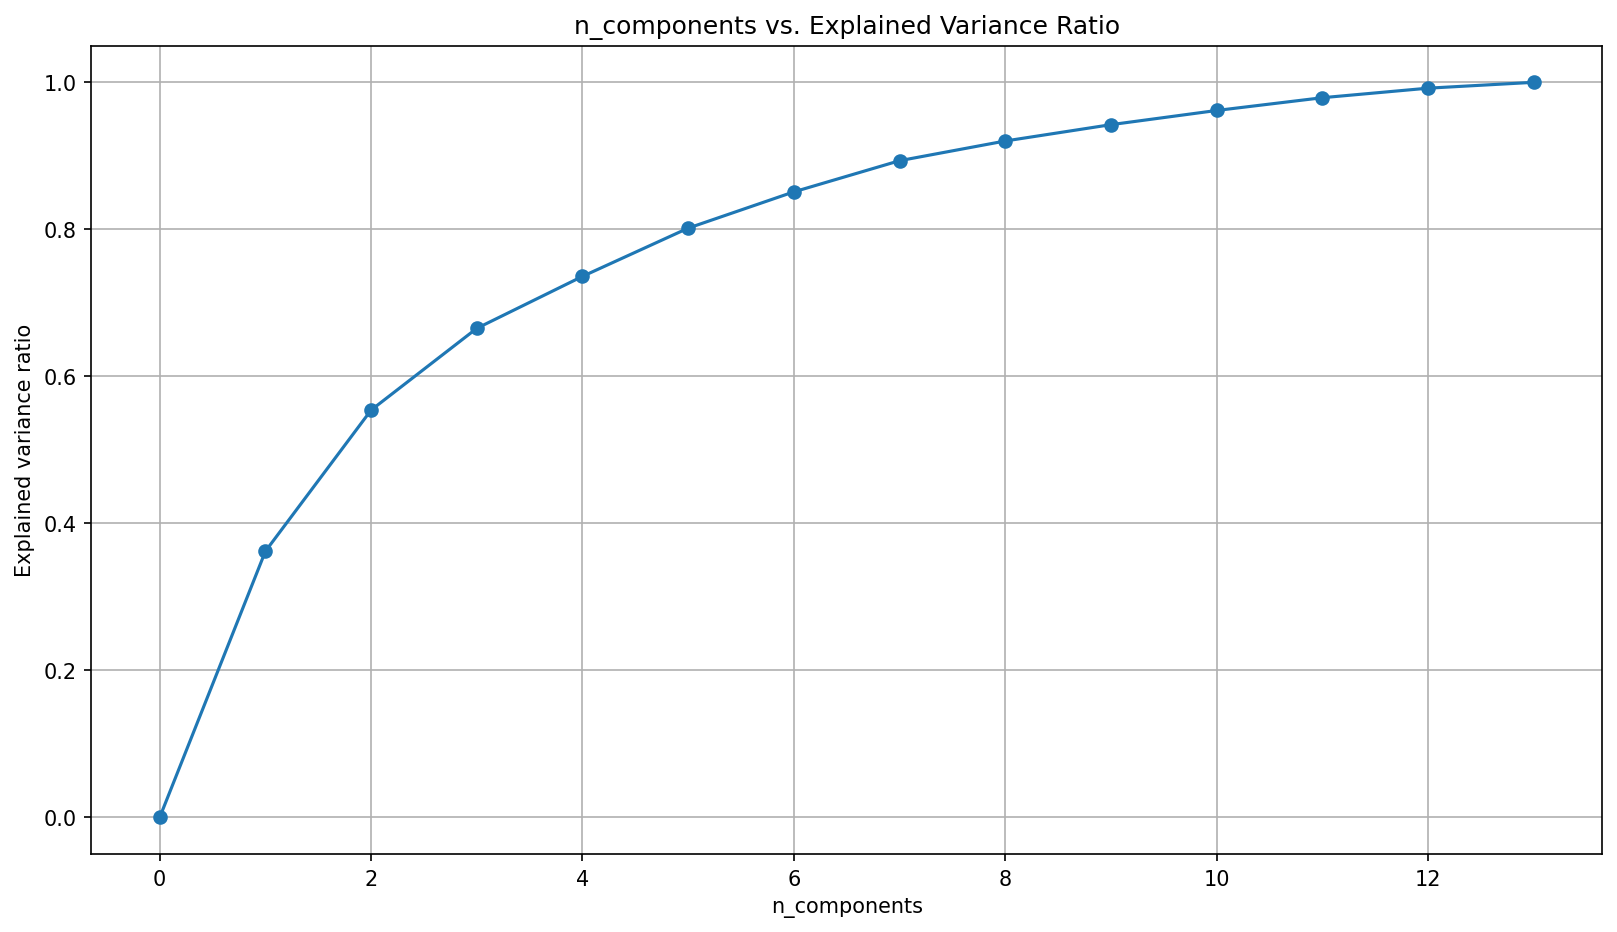

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,7),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

When we use all the 13 components, the explained_variance_ratio_ is 1.0 indicating that we’ve captured 100% of the variance in the dataset. 

In this example, we see that with 6 principal components, we'll be able to capture more than 80% of variance in the input dataset.